In [1]:
import pandas as pd
import numpy as np
import warnings; 
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Sales.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          113036 non-null  int64 
 1   Date              113036 non-null  object
 2   Day               113036 non-null  int64 
 3   Month             113036 non-null  object
 4   Year              113036 non-null  int64 
 5   Customer_Age      113036 non-null  int64 
 6   Age_Group         113036 non-null  object
 7   Customer_Gender   113036 non-null  object
 8   Country           113036 non-null  object
 9   State             113036 non-null  object
 10  Product_Category  113036 non-null  object
 11  Sub_Category      113036 non-null  object
 12  Product           113036 non-null  object
 13  Order_Quantity    113036 non-null  int64 
 14  Unit_Cost         113036 non-null  int64 
 15  Unit_Price        113036 non-null  int64 
 16  Profit            113036 non-null  int

In [4]:
df.head()

,order_id,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,1/1/2011,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
1,2,1/1/2011,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
2,3,1/1/2011,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
3,4,1/1/2011,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
4,5,1/1/2011,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621


In [5]:
df=df[["Date","Revenue"]]
df.head()

,Date,Revenue
0,1/1/2011,1813
1,1/1/2011,5439
2,1/1/2011,2419
3,1/1/2011,529
4,1/1/2011,2621


In [6]:
df.columns = ['ds', 'y']

In [7]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
113031,2016-07-31,359
113032,2016-07-31,70
113033,2016-07-31,35
113034,2016-07-31,697
113035,2016-07-31,1066


In [8]:
from prophet import Prophet

In [9]:
model= Prophet(interval_width=0.95, daily_seasonality=True)

In [10]:
model.fit(df)

18:43:43 - cmdstanpy - INFO - Chain [1] start processing
18:45:35 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,2103.207984,1504.664736,5726.203725,2103.207984,2103.207984,1432.635556,1432.635556,1432.635556,1162.02125,1162.02125,1162.02125,6.933774,6.933774,6.933774,263.680532,263.680532,263.680532,0.0,0.0,0.0,3535.843540
1,2011-01-02,2103.983810,1454.717741,5658.018055,2103.983810,2103.983810,1423.403231,1423.403231,1423.403231,1162.02125,1162.02125,1162.02125,5.570534,5.570534,5.570534,255.811447,255.811447,255.811447,0.0,0.0,0.0,3527.387041
2,2011-01-03,2104.759637,1304.878253,5824.139458,2104.759637,2104.759637,1414.934049,1414.934049,1414.934049,1162.02125,1162.02125,1162.02125,4.441422,4.441422,4.441422,248.471378,248.471378,248.471378,0.0,0.0,0.0,3519.693686
3,2011-01-04,2105.535463,1126.681533,5656.414030,2105.535463,2105.535463,1396.487597,1396.487597,1396.487597,1162.02125,1162.02125,1162.02125,-7.301381,-7.301381,-7.301381,241.767729,241.767729,241.767729,0.0,0.0,0.0,3502.023061
4,2011-01-05,2106.311290,1415.000767,5826.452142,2106.311290,2106.311290,1408.948437,1408.948437,1408.948437,1162.02125,1162.02125,1162.02125,11.135706,11.135706,11.135706,235.791482,235.791482,235.791482,0.0,0.0,0.0,3515.259727


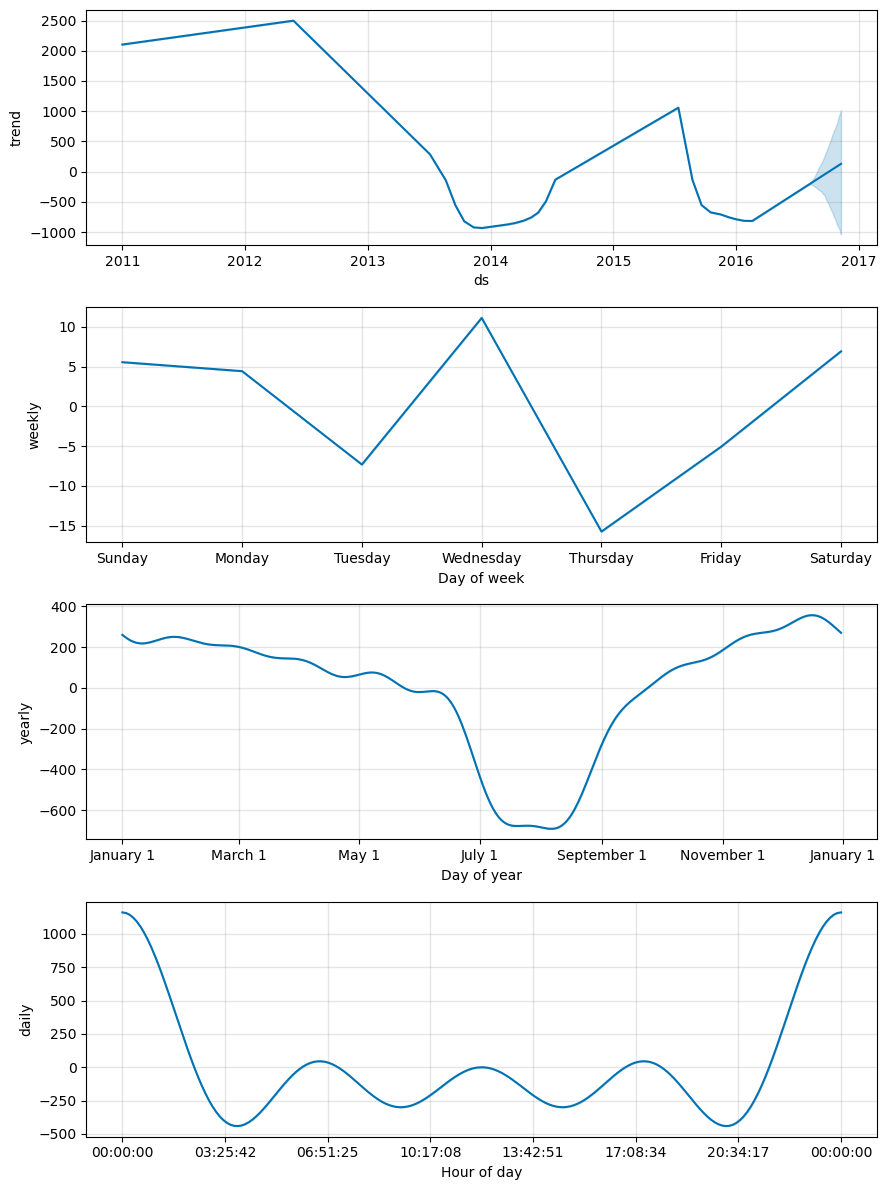

In [12]:
plt = model.plot_components(forecast)
